In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# data set source: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset
movies_df = pd.read_csv('./data/IMDb_movies.csv'
                        , low_memory = False
                       )
movies_df.sample(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
13507,tt0063013,Nuda sotto la pelle,The Girl on a Motorcycle,1968,1969,"Drama, Romance",91,"UK, France",English,Jack Cardiff,...,"Alain Delon, Marianne Faithfull, Roger Mutton,...",A married woman leaves her husband and zooms o...,5.3,1955,NaN,NaN,NaN,NaN,43.0,43.0
84935,tt8960204,Asih,Asih,2018,2018-10-11,Horror,77,Indonesia,Indonesian,Awi Suryadi,...,"Shareefa Daanish, Citra Kirana, Darius Sinathr...","The origins of a Kuntilanak named ""Asih"", one ...",5.3,156,NaN,NaN,NaN,NaN,4.0,7.0
2710,tt0029034,I Cover the War!,I Cover the War!,1937,1937-07-04,"Action, Drama, Romance",68,USA,English,Arthur Lubin,...,"John Wayne, Gwen Gaze, Don Barclay, Charles Br...",Newsreel cameraman Bob Adams heads to North Af...,6.2,135,$ 70000,NaN,NaN,NaN,6.0,1.0
36426,tt0208178,Moonlight Whispers,Gekkô no sasayaki,1999,2000-12-23,"Drama, Romance",100,Japan,Japanese,Akihiko Shiota,...,"Kenji Mizuhashi, Tsugumi, Kôta Kusano, Harumi ...",Two seemingly innocent school kids are obsesse...,6.9,747,NaN,NaN,NaN,57.0,10.0,11.0
832,tt0020570,La tragedia di Pizzo Palù,Die weiße Hölle vom Piz Palü,1929,1930,"Action, Adventure, Drama",150,Germany,German,"Arnold Fanck, Georg Wilhelm Pabst",...,"Gustav Diessl, Leni Riefenstahl, Ernst Peterse...","A man climbs a 12,000-foot mountain to search ...",7.2,882,NaN,NaN,NaN,NaN,17.0,8.0


In [3]:
movies_df.shape

(85855, 22)

In [4]:
for x in movies_df.columns:
    print(x)

imdb_title_id
title
original_title
year
date_published
genre
duration
country
language
director
writer
production_company
actors
description
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
reviews_from_users
reviews_from_critics


In [5]:
movies_df.actors.iloc[0]

'Blanche Bayliss, William Courtenay, Chauncey Depew'

In [6]:
movies_df.metascore.iloc[0]

nan

In [7]:
movies_df.reviews_from_users.iloc[0]

1.0

In [8]:
movies_df.reviews_from_critics.iloc[0]

2.0

In [9]:
movies_df.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [10]:
movies_df.avg_vote.max(), movies_df.avg_vote.min()

(9.9, 1.0)

In [11]:
movies_df.avg_vote.iloc[0]

5.9

In [12]:
movies_df.avg_vote.max(), movies_df.avg_vote.min()

(9.9, 1.0)

In [13]:
movies_df.votes.iloc[0]

154

In [24]:
actor_movie_df = movies_df[['actors', 'title', 'avg_vote']].copy()

In [25]:
actor_movie_df.head()

,actors,title,avg_vote
0,"Blanche Bayliss, William Courtenay, Chauncey D...",Miss Jerry,5.9
1,"Elizabeth Tait, John Tait, Norman Campbell, Be...",The Story of the Kelly Gang,6.1
2,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Den sorte drøm,5.8
3,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",Cleopatra,5.2
4,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",L'Inferno,7.0


In [26]:
actor_movie_df = actor_movie_df.assign(actors=actor_movie_df.actors.str.split(', ')).explode('actors').reset_index()
actor_movie_df.drop('index', axis=1, inplace=True)
actor_movie_df.head(10)

,actors,title,avg_vote
0,Blanche Bayliss,Miss Jerry,5.9
1,William Courtenay,Miss Jerry,5.9
2,Chauncey Depew,Miss Jerry,5.9
3,Elizabeth Tait,The Story of the Kelly Gang,6.1
4,John Tait,The Story of the Kelly Gang,6.1
5,Norman Campbell,The Story of the Kelly Gang,6.1
6,Bella Cola,The Story of the Kelly Gang,6.1
7,Will Coyne,The Story of the Kelly Gang,6.1
8,Sam Crewes,The Story of the Kelly Gang,6.1
9,Jack Ennis,The Story of the Kelly Gang,6.1


In [27]:
# Data set too large for pivot table, use neural networks
actor_movie_df.shape

(1155362, 3)

In [28]:
# encoding...
actor_ids = actor_movie_df['actors'].unique().tolist()
actor2actor_encoded = {x: i for i, x in enumerate(actor_ids)}
actor_encoded2actor = {i: x for i, x in enumerate(actor_ids)}

movie_ids = actor_movie_df['title'].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}

actor_movie_df['actors'] = actor_movie_df['actors'].map(actor2actor_encoded)
actor_movie_df['title'] = actor_movie_df['title'].map(movie2movie_encoded)

num_actors = len(actor2actor_encoded)
num_movies = len(movie2movie_encoded)

actor_movie_df['avg_vote'] = actor_movie_df['avg_vote'].values.astype(np.float32)

min_vote = min(actor_movie_df['avg_vote'])
max_vote = max(actor_movie_df['avg_vote'])

print(f'Actors: {num_actors}\nMovies: {num_movies}\nMin Vote: {min_vote}\nMax Vote: {round(max_vote, 1)}')

Actors: 417321
Movies: 82094
Min Vote: 1.0
Max Vote: 9.9


In [29]:
# prepare training and valdiation data
from random import shuffle
idx_lst = [x for x in range(0, actor_movie_df.shape[0])]
shuffle(idx_lst)
actor_movie_df = actor_movie_df.iloc[idx_lst]

In [30]:
actor_movie_df.head()

,actors,title,avg_vote
677563,52324,48359,6.8
389724,102832,28318,6.9
967299,241263,68638,4.5
733159,19846,52278,3.5
138263,33079,10845,4.0


In [31]:
x = actor_movie_df[['actors', 'title']].values
y = actor_movie_df['avg_vote'].apply(lambda x: (x - min_vote)/(max_vote - min_vote))

In [33]:
train_indices = int(0.9 * actor_movie_df.shape[0])
X_train, X_test, y_train, y_test = (x[:train_indices]
                                    , x[train_indices:]
                                    , y[:train_indices]
                                    , y[train_indices:]
                                   )

In [40]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_actors, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_actors = num_actors
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        
        self.actor_embedding = layers.Embedding(num_actors
                                               , embedding_size
                                               , embeddings_initializer="he_normal"
                                               , embeddings_regularizer=keras.regularizers.l2(1e-6)
                                              )
        self.actor_bias = layers.Embedding(num_actors, 1)
        
        self.movie_embedding = layers.Embedding(num_movies
                                                , embedding_size
                                                , embeddings_initializer="he_normal"
                                                , embeddings_regularizer=keras.regularizers.l2(1e-6)
                                               )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        actor_vector = self.actor_embedding(inputs[:, 0])
        actor_bias = self.actor_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        
        dot_actor_movie = tf.tensordot(actor_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_actor_movie + actor_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_actors
                       , num_movies
                       , EMBEDDING_SIZE
                      )

model.compile(loss=tf.keras.losses.BinaryCrossentropy()
              , optimizer=keras.optimizers.Adam(lr=0.001)
             )

In [41]:
history = model.fit(x=X_train
                    , y=y_train
                    , batch_size=64
                    , epochs=5
                    , verbose=1
                    , validation_data=(X_test, y_test)
                   )

Epoch 1/5
16248/16248 [==============================] - 2056s 127ms/step - loss: 0.6818 - val_loss: 0.6714
Epoch 2/5
16248/16248 [==============================] - 2035s 125ms/step - loss: 0.6639 - val_loss: 0.6587
Epoch 3/5
16248/16248 [==============================] - 2036s 125ms/step - loss: 0.6541 - val_loss: 0.6528
Epoch 4/5
16248/16248 [==============================] - 2038s 125ms/step - loss: 0.6509 - val_loss: 0.6511
Epoch 5/5
16248/16248 [==============================] - 2037s 125ms/step - loss: 0.6500 - val_loss: 0.6504


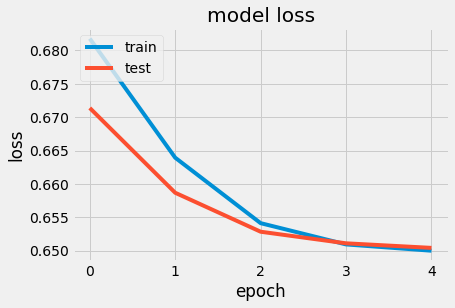

In [42]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [13]:
names_df = pd.read_csv('./data/IMDb_names.csv'
                       , low_memory = False
                      )
names_df.sample(5)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
221874,nm2992243,Monique Zordan,Monique Zordan,165.0,"Monique Zordan is an actress, known for Jack i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
206767,nm2412682,Hyun-Woo Ji,Hyun-Woo Ji,NaN,"Hyun-Woo Ji is an actor, known for Sal-in-so-s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
252377,nm5381347,Yuiko Kobayashi,Yuiko Kobayashi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
44335,nm0279162,Dietrich Fischer-Dieskau,Albert Dietrich Fischer,NaN,"Dietrich Fischer-Dieskau was born on May 28, 1...","May 28, 1925 in Berlin, Germany",1925-05-28,"Berlin, Germany","May 18, 2012 in Starnberg, Bavaria, Germany (...",2012-05-18,"Starnberg, Bavaria, Germany",in his sleep,Julia Varady (1978 - 18 May 2012) (his death)...,4,2,1,3
235130,nm4197975,Pablo Donetch,Pablo Donetch,NaN,"Pablo Donetch is an actor, known for Retorno (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
